# Rattlesnake temperatures whilst eating

### The question

<div>
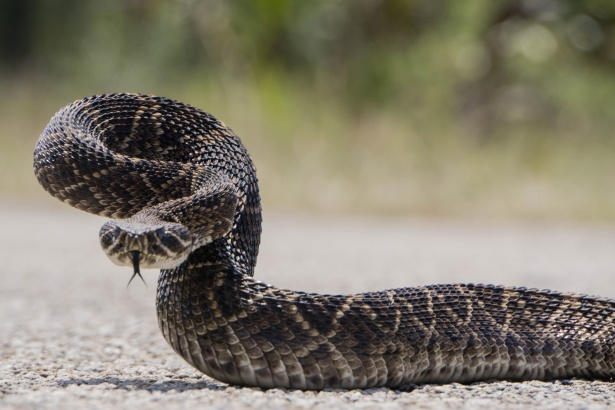
</div>

Scientists wanted to know much rattlesnake temperature changes when they are digesting meals of different sizes. They measured weight of meal relative to weight of each rattlesnake and the maximum change in temperature during digestion relative to pre-meal temperature. 

If there is no relationship between temperature change and meal size, then a plot of temperature change against meal size would exhibit a flat line. A line, that is, with a slope of zero as sketched in the left panel if the figure below. Conversely, if there is a relationship between them such a plot would exhibit either a rising or a falling line. That is, a line with non-zero slope as sketched in the middle and right panels in the figure below.

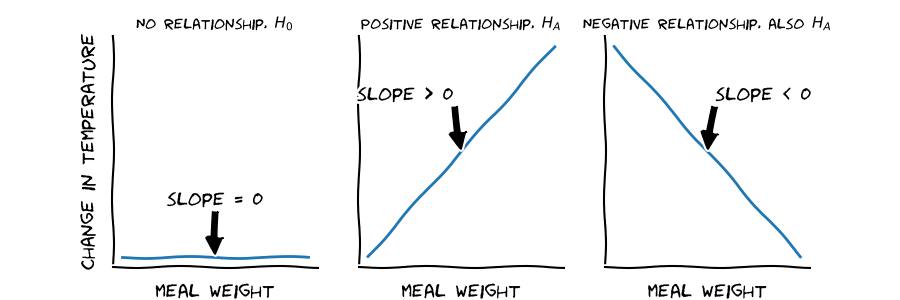

Remember, the null hypothesis is the hypothesis of no difference or no change. So we can write down our null and alternative hypotheses:

- H0: The slope of the relationship between temperature change and meal size is zero.
- HA: The slope of the relationship between temperature change and meal size is not zero.

### Imports

In [1]:
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols

### Load and print the data

First we read in the dataset and print it to see how it looks and what the variable names, types and values are.

In [2]:
snakes = pd.read_csv('../Datasets/rattlesnakes.csv')
snakes

,mealSize,tempChange
0,0.0,0.05
1,0.0,-0.05
2,0.0,-0.15
3,5.5,0.15
4,12.0,0.35
5,14.5,0.35
6,23.3,0.65
7,27.1,0.75
8,29.3,0.75
9,20.8,0.85


Variable names are "mealSize" and "tempChange". Both variables are continuous numerical variables. "mealSize" is the weight of the meal relative to each rattlesnake's weight recorded as a percentage. So a meal size of 50.4 means that the weight of the meal was half the weight of the rattlesnake. "tempChange" is measured in degrees Celsius.

Meal size explains temperature change so "mealSize" is the explanatory variable and "tempChange" is the response variable.

As both variables are numerical we should plot them as a scatter plot. If we use seaborn's lmplot we'll get a scatter plot with the addition of the fit of the linear model `tempChange ~ mealSize` thrown in for free. This is useful to check whether the variables are related or not (and should confirm our own statistical analysis) and to check that the fit of the model looks reasonable. If not we might need a different model.

### Plot the data

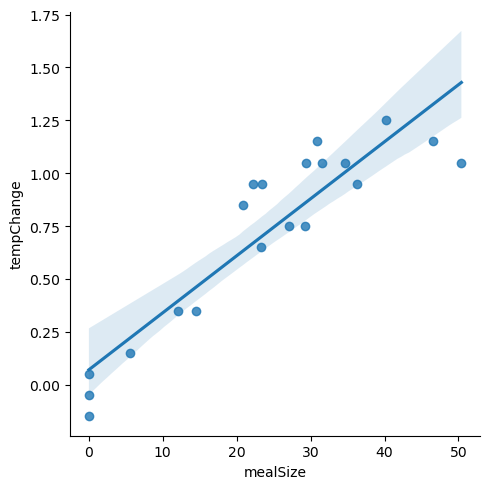

In [3]:
sns.lmplot(x='mealSize', y='tempChange', data=snakes);

The data look fine and seaborn's fit of the model also looks good. There is a clear positive relationship between meal size and temperature change.

The solid blue line is also called the **regression line**. It is the estimated population mean temperature change for each value of meal size. For example, a meal size of 50% of rattlesnake weight causes an estimated mean temperature change of about 1.4 $^\circ\mathrm{C}$. What does this actually mean? Say we repeatedly fed rattlesnakes meal sizes of 50% of their weight. The temperature change for each rattlesnake would be different, but the estimated mean temperature change of all these rattlesnakes would be about 1.4 $^\circ\mathrm{C}$.

The blue band is the 95% confidence interval of the regression line. It tells us how precise the estimated mean temperature change is.

Now let's do our own statistical analysis.

"tempChange" is the response variable and "mealSize" is the explanatory variable, so our model is:

    tempChange ~ mealSize

which simply says that temperature change is related to meal size.

### Code and fit the model

In [4]:
formula = 'tempChange ~ mealSize'
fit = ols(formula, snakes).fit()
fit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0707,0.078,0.903,0.379,-0.094,0.235
mealSize,0.0269,0.003,9.624,0.000,0.021,0.033


### Interpret the summary of the model fit

The interpretation of the summary is slightly different than for the ladybird size dataset. 

The coefficient of `Intercept` is the temperature change for a mealSize of zero. It's where the solid blue line in the plot above intercepts, or crosses, the *y*-axis. This is why it is called "Intercept". A meal size of zero is obviously no meal at all. There are three rattlesnakes that were not fed a meal. It's significance test shows that it is not significantly different from zero as *p* = 0.379 and it's 95% CI contains zero. This shouldn't be unexpected. A rattlesnake not fed will not change its temperature.

Note that there is no reference level in `Intercept` this time. This is because there are no categorical variables in this data from which a reference level can be set.

The coefficient of `mealSize` in the summary table is the slope of the solid blue line. This, of course, is the thing we are interested in testing; our null hypothesis $H_0$. The estimate of the slope is 0.027 $^\circ\mathrm{C}$. So for each percentage point increase in meal size, mean rattlesnake temperatures rise by 0.027 $^\circ\mathrm{C}$.

The *p*-value in the summary table for the test of the null hypothesis that the slope is zero is 0.000. The *p*-value is not actually zero. It is so small that when rounded to three decimal places it becomes zero. The actual *p*-values can be found by running the following code.

In [5]:
fit.pvalues

Intercept    3.786446e-01
mealSize     1.604874e-08
dtype: float64

You can see the *p*-value is actually $1.6 \times 10^{-8}$. Tiny. When this happens the convention is to write *p* < 0.001.

The 95% CI for the slope is (0.021, 0.033) $^\circ\mathrm{C}$. Note that it doesn't contain zero, and therefore the slope is significantly different from zero.

### Report the outcome of the test

There is a statistically significant rise in rattlesnake body temperature of 0.027 $^\circ\mathrm{C}$ (95% CI: (0.021, 0.033) $^\circ\mathrm{C}$) for every percentage point increase in meal size relative to rattlesnake weight (*n* = 20, *t* = 9.6, *p* < 0.001).